## 0. Import Packages

In [1]:
import numpy as np
import tensorflow.compat.v1 as tf
import matplotlib.pyplot as plt

## 1. Load Dataset

In [2]:
mnist = tf.keras.datasets.mnist

training, test = mnist.load_data()

training_img, training_lab = training
test_img, test_lab = test

training_img = np.reshape(training_img, (-1, 28*28))
training_lab = tf.keras.utils.to_categorical(training_lab, 10)

test_img = np.reshape(test_img, (-1, 28*28))
test_lab = tf.keras.utils.to_categorical(test_lab, 10)


training_img = training_img / (np.ones_like(training_img)*255.)
test_img = test_img / (np.ones_like(test_img)*255.)

the number of training dataset: (60000, 784)
the number of test dataset: (10000, 784)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.     

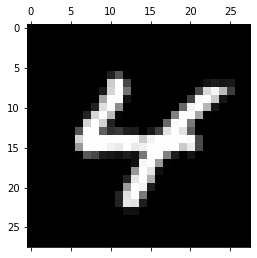

In [3]:
print("the number of training dataset:", np.shape(training_img))
print("the number of test dataset:", np.shape(test_img))


r = np.random.choice(len(training_img), size=1)
sample_img = training_img[r]

sample_img = np.reshape(sample_img, (28, 28))
print(sample_img)

plt.matshow(sample_img, cmap=plt.get_cmap('gray'))
sample_lab = training_lab[r]
print ("label :", np.argmax(sample_lab))

## 2. Training (no batch)

In [4]:
with tf.Session() as sess:
    x = tf.placeholder(tf.float32, [None, 784])
    y = tf.placeholder(tf.float32, [None, 10])

    W = tf.Variable(tf.random_normal([784, 10]))
    b = tf.Variable(tf.random_normal([10]))

    a = 0.05 
    H = tf.nn.softmax(tf.matmul(x, W) + b)
    cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(H), axis=1)) #비용함수

    optimizer = tf.train.GradientDescentOptimizer(a) 
    train = optimizer.minimize(cost) 
                
    predicted = tf.equal(tf.argmax(H,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))                

    init = tf.global_variables_initializer()
    sess.run(init)

    iteration = 200
    for i in range(iteration):
        c, acc, _ = sess.run([cost, accuracy, train], 
                          feed_dict={x: training_img, y: training_lab})
        if i % (iteration//10) == 0:
            print("cost:", c, "acc: ", acc)
          
    print("test acc:", 
          sess.run(accuracy, feed_dict={x: test_img, y: test_lab}))        

cost: nan acc:  0.11218333
cost: nan acc:  0.09871667
cost: nan acc:  0.09871667
cost: nan acc:  0.09871667
cost: nan acc:  0.09871667
cost: nan acc:  0.09871667
cost: nan acc:  0.09871667
cost: nan acc:  0.09871667
cost: nan acc:  0.09871667
cost: nan acc:  0.09871667
test acc: 0.098


## 3. Training with batch

In [5]:
with tf.Session() as sess:
    x = tf.placeholder(tf.float32, [None, 784])
    y = tf.placeholder(tf.float32, [None, 10])

    W = tf.Variable(tf.random_normal([784, 10]))
    b = tf.Variable(tf.random_normal([10]))

    a = 0.05  
    H = tf.nn.softmax(tf.matmul(x, W) + b)
    cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(H), axis=1)) #비용함수

    optimizer = tf.train.GradientDescentOptimizer(a) 
    train = optimizer.minimize(cost) 
                
    predicted = tf.equal(tf.argmax(H,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))                

    init = tf.global_variables_initializer()
    sess.run(init)

    training_epochs = 20
    batch_size = 100
  
    for i in range(training_epochs):
        total_batch = int(np.shape(training_img)[0]/batch_size)
        avg_cost = 0
        avg_acc = 0
      
        for iteration in range(total_batch):
            batch_xs = training_img[iteration : iteration + batch_size]
            batch_ys = training_lab[iteration : iteration + batch_size]
            c, acc, _ = sess.run([cost, accuracy, train], 
                          feed_dict={x: batch_xs, y: batch_ys})
            avg_cost = avg_cost + c/total_batch
            avg_acc = avg_acc + acc/total_batch
          
        print("Epoch:", i, "cost:", avg_cost, "acc: ", avg_acc)
          
    print("test acc:", 
        sess.run(accuracy, feed_dict={x: test_img, y: test_lab}))  

Epoch: 0 cost: 3.3921147129933042 acc:  0.5258666663368562
Epoch: 1 cost: 0.8737592167655636 acc:  0.8149499983588872
Epoch: 2 cost: 0.4701105263084176 acc:  0.877216666738193
Epoch: 3 cost: 0.28859918755789593 acc:  0.9179833347598716
Epoch: 4 cost: 0.19063658894350116 acc:  0.9462166674931851
Epoch: 5 cost: 0.1330319286634525 acc:  0.9666833434502294
Epoch: 6 cost: 0.09780888287971412 acc:  0.9797166764736198
Epoch: 7 cost: 0.07559965071578828 acc:  0.9889333391189609
Epoch: 8 cost: 0.06096169193585712 acc:  0.9935000025232689
Epoch: 9 cost: 0.050835891623670894 acc:  0.9954166684548127
Epoch: 10 cost: 0.043461805852130046 acc:  0.9969500017166213
Epoch: 11 cost: 0.03787201358626286 acc:  0.9982500009735502
Epoch: 12 cost: 0.033509442579622094 acc:  0.9989000007510268
Epoch: 13 cost: 0.030025095744058507 acc:  0.9991833341121762
Epoch: 14 cost: 0.02718694185217225 acc:  0.9993666672706697
Epoch: 15 cost: 0.024835538485397903 acc:  0.999566667079935
Epoch: 16 cost: 0.02285880224779247

## 4. Training MLP with batch

In [6]:
with tf.Session() as sess:
    x = tf.placeholder(tf.float32, [None, 784])
    y = tf.placeholder(tf.float32, [None, 10])


  # more hidden layer
    W1 = tf.Variable(tf.random_normal([784, 128]))
    b1 = tf.Variable(tf.random_normal([128]))

  # activation
    H1 = tf.nn.sigmoid(tf.matmul(x, W1) + b1)


    W = tf.Variable(tf.random_normal([128, 10]))
    b = tf.Variable(tf.random_normal([10]))

    a = 0.05  
    H = tf.nn.softmax(tf.matmul(H1, W) + b)
    cost = tf.reduce_mean(-tf.reduce_sum(y * tf.log(H), axis=1)) #비용함수

    optimizer = tf.train.GradientDescentOptimizer(a) 
    train = optimizer.minimize(cost) 
                
    predicted = tf.equal(tf.argmax(H,1), tf.argmax(y,1))
    accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))                

    init = tf.global_variables_initializer()
    sess.run(init)

    training_epochs = 50
    batch_size = 100

    for i in range(training_epochs):
        total_batch = int(np.shape(training_img)[0]/batch_size)
        avg_cost = 0
        avg_acc = 0
      
        for iteration in range(total_batch):
            batch_xs = training_img[iteration : iteration + batch_size]
            batch_ys = training_lab[iteration : iteration + batch_size]
            c, acc, _ = sess.run([cost, accuracy, train], 
                          feed_dict={x: batch_xs, y: batch_ys})
            avg_cost = avg_cost + c/total_batch
            avg_acc = avg_acc + acc/total_batch
          
        print("Epoch:", i, "cost:", avg_cost, "acc: ", avg_acc)

      # p, pred : check wrong prediction
    p, pred, acc = sess.run([tf.argmax(H, 1), predicted, accuracy],  feed_dict={x: test_img, y: test_lab}) 
    print("test acc:", acc)


Epoch: 0 cost: 1.7084393815199557 acc:  0.6430833331743885
Epoch: 1 cost: 0.3163996883854272 acc:  0.923266667326295
Epoch: 2 cost: 0.14840306288873154 acc:  0.9792666735251729
Epoch: 3 cost: 0.09221312007866803 acc:  0.9908166709542288
Epoch: 4 cost: 0.06572869589862727 acc:  0.9943000031511039
Epoch: 5 cost: 0.05056076849189898 acc:  0.9961000024279026
Epoch: 6 cost: 0.04085457953158764 acc:  0.9968333351612156
Epoch: 7 cost: 0.03412942713126538 acc:  0.9972500015298589
Epoch: 8 cost: 0.029225002923049043 acc:  0.99803333441417
Epoch: 9 cost: 0.025545866745524125 acc:  0.9985166675845852
Epoch: 10 cost: 0.022707761293277135 acc:  0.9988500007987102
Epoch: 11 cost: 0.020445587197318673 acc:  0.9989500007033427
Epoch: 12 cost: 0.018585284613848962 acc:  0.9990000008543412
Epoch: 13 cost: 0.017015593853623907 acc:  0.9990666674574296
Epoch: 14 cost: 0.015663800030791507 acc:  0.9992166674137195
Epoch: 15 cost: 0.014480735129521553 acc:  0.9992166674137195
Epoch: 16 cost: 0.0134323282865

## 5. Check wrong data

Target :  8
Prediction :  5


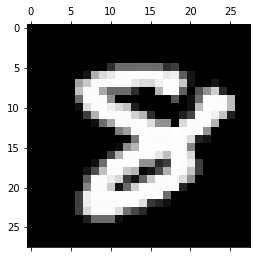

Target :  5
Prediction :  8


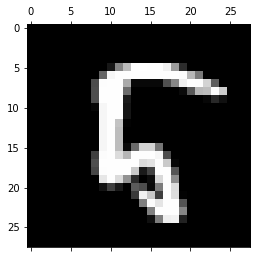

Target :  8
Prediction :  1


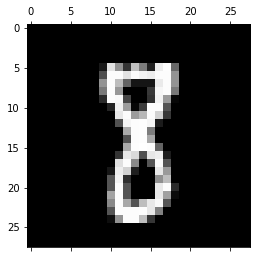

In [7]:
random_num = np.random.choice((np.where(pred==False)[0]), size=3)
# print(random_num)
for i in random_num:
    print("Target : ", np.argmax(test_lab[i]))
    print("Prediction : ", p[i])
    sample_img = np.reshape(test_img[i],(28,28))
    plt.matshow(sample_img, cmap=plt.get_cmap('gray'))    
    plt.show()
      